Great, let's move on to the next notebook which focuses on "Distributed Consensus in OND."

### Objectives:

1. Introduce the concept of distributed consensus in the context of Observational Network Dynamics (OND).
2. Implement a basic simulation to demonstrate how consensus can emerge from local agent interactions.
3. Visualize the time evolution of agent states and the final consensus state.

Distributed consensus refers to the process by which a collection of agents (or nodes) in a network reach an agreement through local interactions. OND provides a framework to study this phenomenon, considering how individual limitations and observational capabilities influence consensus formation.

For simplicity, let's consider a one-dimensional state for each node. Nodes are connected in a network, and they update their states by taking into account their neighbors' states. The state update rule is given by:

\[
x_i(t+1) = x_i(t) + \alpha \left( \frac{\sum_{j \in \text{neighbors}} x_j(t)}{|\text{neighbors}|} - x_i(t) \right)
\]

Here, \( \alpha \) is the rate at which states are updated, and \( x_i(t) \) is the state of node \( i \) at time \( t \).

Here's the code to implement this simulation:

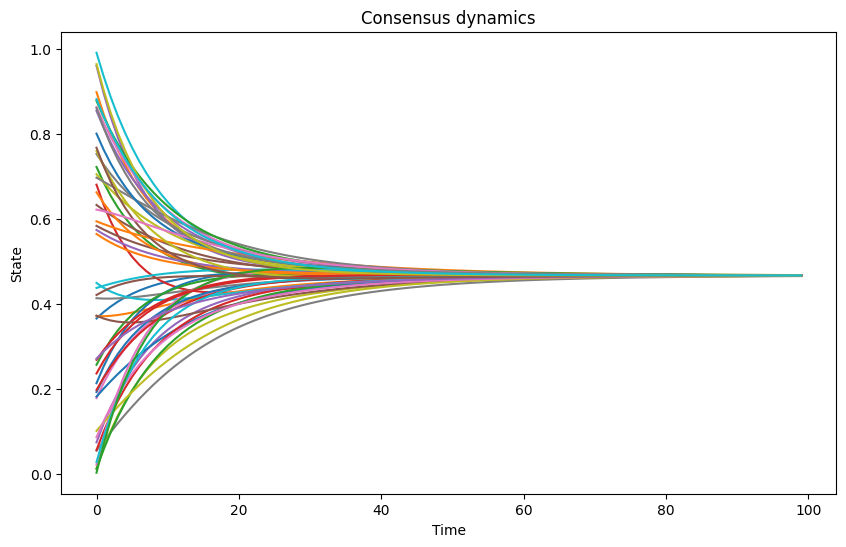

In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters for the consensus model
N_nodes = 50  # Number of nodes in the network
alpha_cons = 0.1  # Rate of state update

# Generate a random graph to represent the network
G_cons = nx.erdos_renyi_graph(N_nodes, 0.2)

# Initial states for each node
initial_states_cons = np.random.uniform(0, 1, N_nodes)

# Function to update the states based on neighbors
def update_states_cons(states, alpha_cons, adj_matrix_cons):
    inputs = np.dot(adj_matrix_cons, states)
    delta_states = inputs / np.sum(adj_matrix_cons, axis=1) - states
    return states + alpha_cons * delta_states

# Simulate the consensus dynamics over time
T = 100
states_cons = np.zeros((N_nodes, T))
states_cons[:, 0] = initial_states_cons

for t in range(1, T):
    states_cons[:, t] = update_states_cons(states_cons[:, t-1], alpha_cons, nx.adjacency_matrix(G_cons).toarray())

# Plot the states over time
plt.figure(figsize=(10, 6))
plt.plot(states_cons.T)
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Consensus dynamics')
plt.show()

We can visualize the time evolution of node states, observing how they move toward a consensus value over time.

Would you like to delve deeper into this notebook or proceed to the next one?

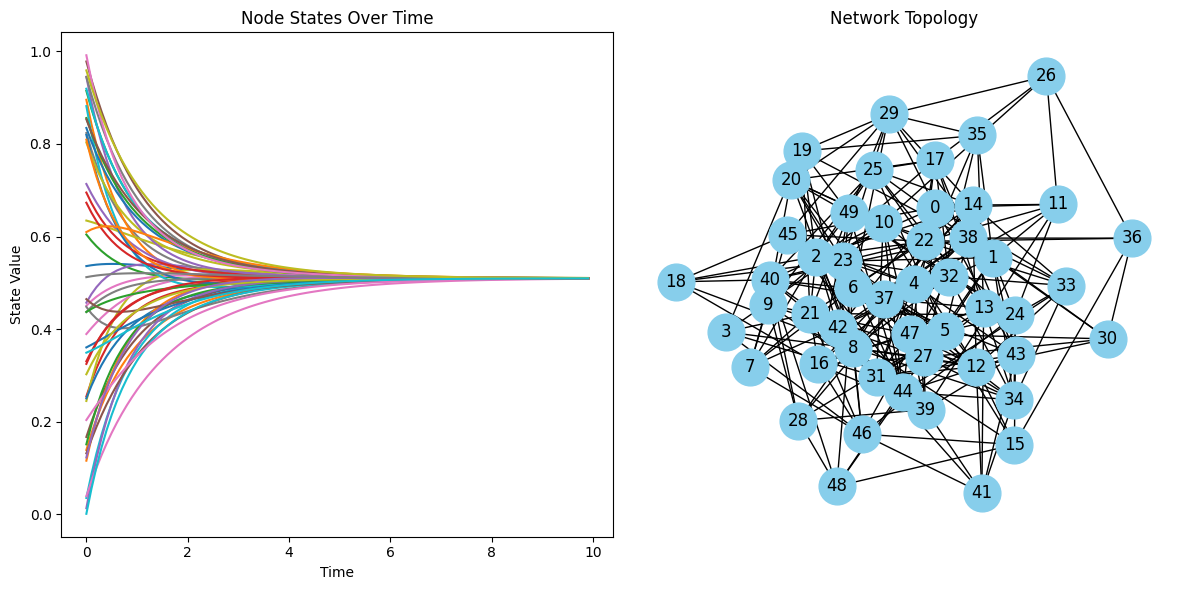

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters for the consensus model simulation
N_nodes = 50  # Number of nodes in the network
alpha_cons = 0.1  # Rate of state update
total_time_cons = 10.0  # Total time for the simulation
dt_cons = 0.1  # Time step
time_steps_cons = int(total_time_cons / dt_cons)  # Number of time steps

# Generate a random graph to represent the network
G_cons = nx.erdos_renyi_graph(N_nodes, 0.2)
adj_matrix_cons = nx.adjacency_matrix(G_cons).toarray()

# Initial states for each node
initial_states_cons = np.random.uniform(0, 1, N_nodes)

# Store the states at each time step
states_over_time_cons = np.zeros((time_steps_cons, N_nodes))

# Initial state
states_over_time_cons[0, :] = initial_states_cons

# Function to update the states based on neighbors
def update_states_cons(states, alpha_cons, adj_matrix_cons):
    inputs = np.dot(adj_matrix_cons, states)
    avg_inputs = inputs / np.sum(adj_matrix_cons, axis=1)
    delta_states = avg_inputs - states
    return states + alpha_cons * delta_states

# Simulate the consensus dynamics over time
for t in range(1, time_steps_cons):
    states_t = states_over_time_cons[t-1, :]
    states_over_time_cons[t, :] = update_states_cons(states_t, alpha_cons, adj_matrix_cons)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, total_time_cons, dt_cons), states_over_time_cons)
plt.title('Node States Over Time')
plt.xlabel('Time')
plt.ylabel('State Value')

plt.subplot(1, 2, 2)
nx.draw(G_cons, with_labels=True, node_color='skyblue', node_size=700, font_size=12)
plt.title('Network Topology')

plt.tight_layout()
plt.show()
